In [1]:
# Linearity check for an area detector

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.measure import block_reduce

In [36]:
filenames = glob.glob('multiple exposure times/*.tif')
print(filenames)

# Function to read in files
def read_files(filenames):
    data = []
    for i in range (0, len(filenames)):
        data.append(io.imread(filenames[i]))
    data = np.asarray(data)
    return data

# Read in image files
images = read_files(filenames)

# Exposure times (seconds)
xp = np.array((0.1, 0.2, 0.3, 0.5))

['multiple exposure times\\d450_CeO2_atten2_100ms-000000.tif', 'multiple exposure times\\d450_CeO2_atten2_200ms-000000.tif', 'multiple exposure times\\d450_CeO2_atten2_300ms-000000.tif', 'multiple exposure times\\d450_CeO2_atten2_500ms-000000.tif']


Text(0, 0.5, 'Intensity')

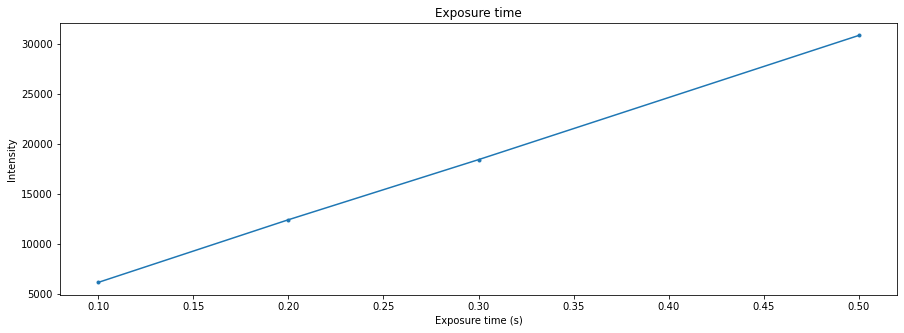

In [64]:
# Check overall detector linearity by taking the average (median) intensity value of the detector
# Median is used in case there are a large number of hot pixels reading extremely high 
av_intensity = []
for i in range (0, len(images)):
    av_intensity.append(np.median(images[i]))
plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(xp, av_intensity, marker = '.')
plt.title('Exposure time')
plt.xlabel('Exposure time (s)')
plt.ylabel('Intensity')

Text(0.5, 1.0, 'Pixel position (900, 87)')

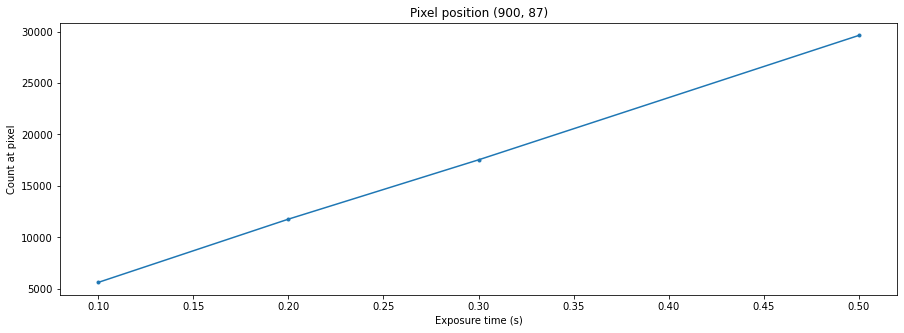

In [65]:
# Check a single pixel for linearity
x_pos, y_pos = 900, 87 # x-y position of pixel to be plotted through series

plt.rcParams["figure.figsize"] = (15, 5)
plt.plot(xp, images[:, x_pos, y_pos], marker = '.')
plt.xlabel('Exposure time (s)')
plt.ylabel('Count at pixel')
plt.title('Pixel position (' + str(x_pos) + ', '+ str(y_pos)+')')

In [66]:
# Calculate linearity of detector pixels
# Downsample images by taking a 10x10 block median
r_images = block_reduce(images, block_size = (1, 10, 10), func = np.nanmedian)
# r_images = images # uncomment this line if you want to calculate full image

r_sq = np.zeros((np.shape(r_images)[1:3])) # Create array for r^2 values in shape of images
# Calculate a linear model for each pixel and return the r^2 value
# This is horribly slow but I'm too lazy to speed it up
for i in range (0, r_images.shape[1]):
    for j in range (0, r_images.shape[2]):
        x = xp.reshape((-1, 1)) # Make series of values into format expected by linear regresion package
        y = r_images[:, i, j] # Take pixel value at some x, y position (i, j) through series of images
        
        model = LinearRegression().fit(x, y) # Fit linear model to pixel intensity through series
        r_sq[i, j] = (model.score(x, y)) # Get r^2 value and add to array
    
#    print(i, end = ', ') # Print current row being calculated 

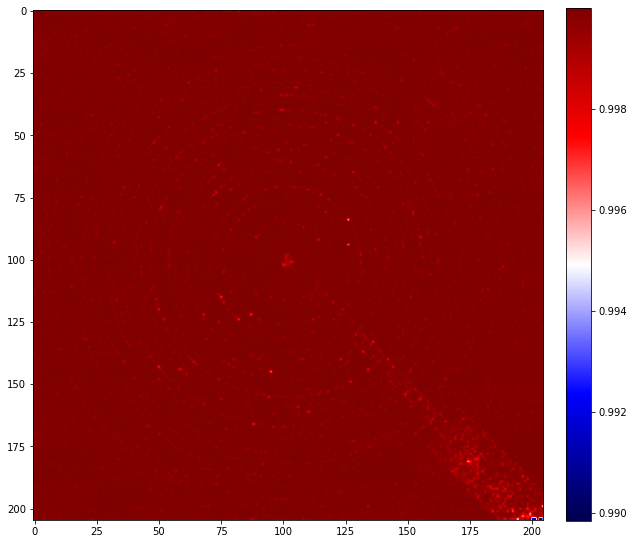

In [67]:
# Plot map of r^2 values
plt.rcParams["figure.figsize"] = (10, 10)
plt.imshow(r_sq, cmap = 'seismic')
plt.colorbar(fraction=0.046, pad=0.04) # Crap in here resizes colorbar to match plot

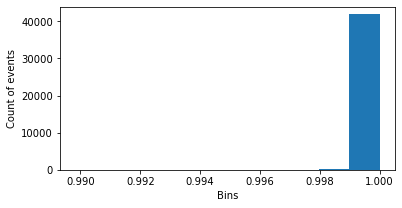

In [63]:
# Plot histogram of r^2 values
plt.rcParams["figure.figsize"] = (6, 3)
plt.hist(np.ndarray.flatten(r_sq))
plt.ylabel('Count of events')
plt.xlabel('Bins')
plt.show()